# Alex Dvorak, Project 8, December 18, 2021 

Context:

You are provided with a dataset  of  images of  plant seedlings at various stages of  grown.  Each image has a filename that is its unique  id.  The  dataset  comprises  12  plant  species.  The  goal  of  the  project  is  to  create  a  classifier  capable  of  determining  a plant's species from a photo.

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are  also  put  into  the  Labels.csv.  So  that  you  can  work  on  the  data/project  seamlessly  without  worrying  about  the  high  data volume.

In [1]:
# Importing General Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import cv2 as cv

# Preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dropout, Dense
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# Loading and Viewing the Dataset

In [2]:
seedling_df = np.load('images.npy') # loading the images stored as a numpy file
labels = pd.read_csv('Labels.csv') # loading the labels in the csv file

In [3]:
print(seedling_df.shape) # number of images, followed by pixel dimensions, followed by color channels
print(labels.shape) # number of images

(4750, 128, 128, 3)
(4750, 1)


In [4]:
labels.value_counts() # proportions of each class

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

Black-grass


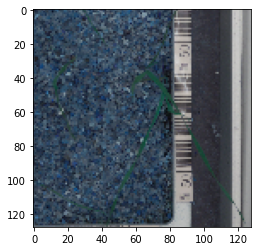

Charlock


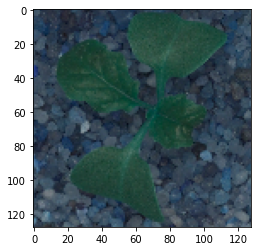

Cleavers


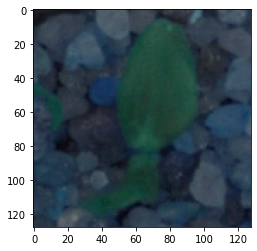

Common Chickweed


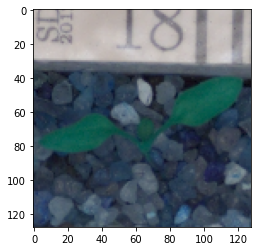

Common wheat


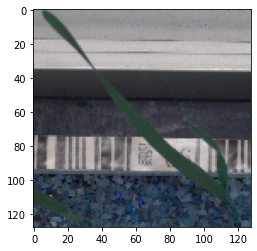

Fat Hen


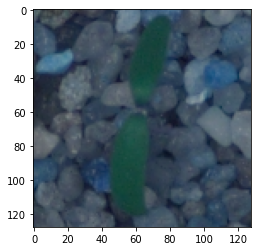

Loose Silky-bent


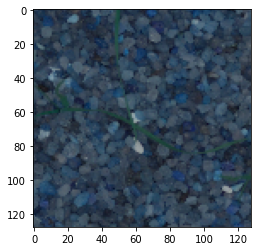

Maize


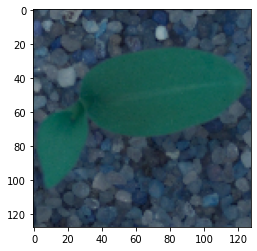

Scentless Mayweed


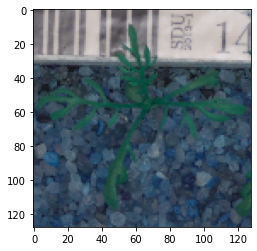

Shepherds Purse


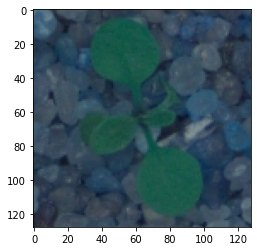

Small-flowered Cranesbill


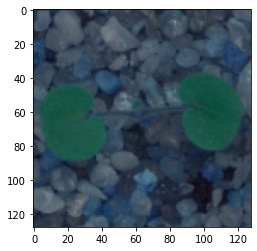

Sugar beet


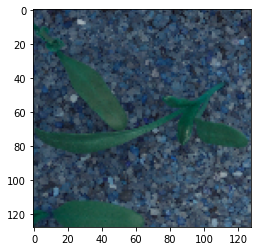

In [5]:
index_list = np.unique(labels['Label'], return_index=True) 
  # creates a list with two lists inside
  # first list includes the unique values and second list includes an index for one of the unique values
for i in np.arange(len(index_list[0])): # loops through the lists
  print(index_list[0][i]) # prints the unique label
  plt.imshow(seedling_df[index_list[1][i]]) # shows image of seedling using the indices of the unique labels
  plt.show() # shows the image before continuing to the next unique value

# Exploratory Data Analysis

In [6]:
# PRODUCING THE MEAN IMAGE OF EACH CLASS

# Creating a list of only Black-grass images
blackgrass = labels.groupby('Label').get_group('Black-grass') # creates a DataFrame of only Black-grass label
blackgrass_images = [] # creates a list of images
for idx in blackgrass.index.tolist(): # loops through indices from that grouped DataFrame
  blackgrass_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Charlock images
charlock = labels.groupby('Label').get_group('Charlock') # creates a DataFrame of only Charlock label
charlock_images = [] # creates a list of images
for idx in charlock.index.tolist(): # loops through indices from that grouped DataFrame
  charlock_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Cleavers images
cleavers = labels.groupby('Label').get_group('Cleavers') # creates a DataFrame of only Cleavers label
cleavers_images = [] # creates a list of images
for idx in cleavers.index.tolist(): # loops through indices from that grouped DataFrame
  cleavers_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Common Chickweed images
common_chickweed = labels.groupby('Label').get_group('Common Chickweed') 
  # creates a DataFrame of only Common Chickweed label
common_chickweed_images = [] # creates a list of images
for idx in common_chickweed.index.tolist(): # loops through indices
  common_chickweed_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Common wheat images
common_wheat = labels.groupby('Label').get_group('Common wheat') # creates a DataFrame of only Common wheat label
common_wheat_images = [] # creates a list of images
for idx in common_wheat.index.tolist(): # loops through indices
  common_wheat_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Fat Hen images
fat_hen = labels.groupby('Label').get_group('Fat Hen') # creates a DataFrame of only Fat Hen label
fat_hen_images = [] # creates a list of images
for idx in fat_hen.index.tolist(): # loops through indices
  fat_hen_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Loose Silky-bent images
loose_silkybent = labels.groupby('Label').get_group('Loose Silky-bent') 
  # creates a DataFrame of only Loose Silky-bent label
loose_silkybent_images = [] # creates a list of images
for idx in loose_silkybent.index.tolist(): # loops through indices
  loose_silkybent_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Maize images
maize = labels.groupby('Label').get_group('Maize') # creates a DataFrame of only Maize label
maize_images = [] # creates a list of images
for idx in maize.index.tolist(): # loops through indices
  maize_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Scentless Mayweed images
scentless_mayweed = labels.groupby('Label').get_group('Scentless Mayweed') 
  # creates a DataFrame of only Scentless Mayweed label
scentless_mayweed_images = [] # creates a list of images
for idx in scentless_mayweed.index.tolist(): # loops through indices
  scentless_mayweed_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Shepherds Purse images
shepherds_purse = labels.groupby('Label').get_group('Shepherds Purse') 
  # creates a DataFrame of only Shepherds Purse label
shepherds_purse_images = [] # creates a list of images
for idx in shepherds_purse.index.tolist(): # loops through indices
  shepherds_purse_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Small-flowered Cranesbill images
cranesbill = labels.groupby('Label').get_group('Small-flowered Cranesbill') 
  # creates a DataFrame of only Small-flowered Cranesbill label
cranesbill_images = [] # creates a list of images
for idx in cranesbill.index.tolist(): # loops through indices
  cranesbill_images.append(seedling_df[idx]) # adds the image at the specific index

# Creating a list of only Sugar beet images
sugar_beet = labels.groupby('Label').get_group('Sugar beet') # creates a DataFrame of only Sugar beet label
sugar_beet_images = [] # creates a list of images
for idx in sugar_beet.index.tolist(): # loops through indices
  sugar_beet_images.append(seedling_df[idx]) # adds the image at the specific index

Mean image for Black-grass class:


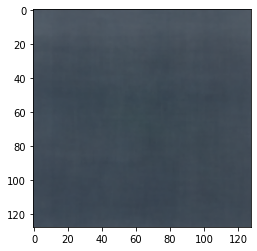

Mean image for Charlock class:


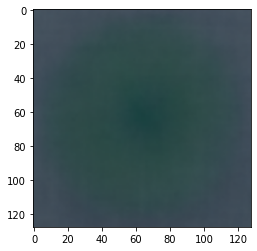

Mean image for Cleavers class:


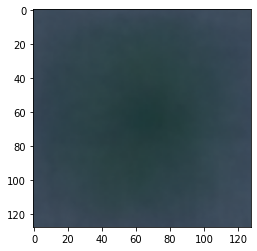

Mean image for Common Chickweed class:


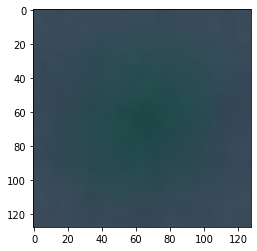

Mean image for Common Wheat class:


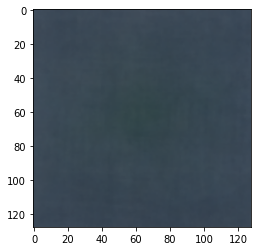

Mean image for Fat Hen class:


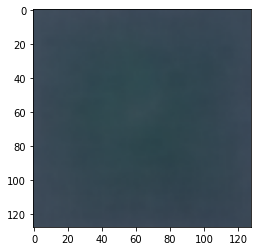

Mean image for Loose Silky-bent class:


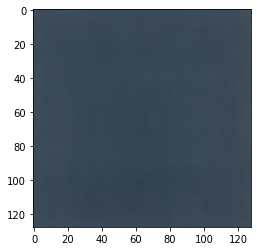

Mean image for Maize class:


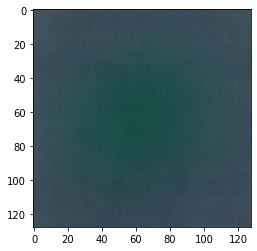

Mean image for Scentless Mayweed class:


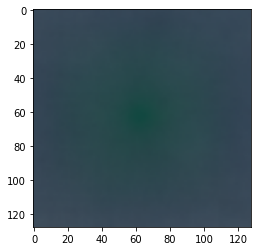

Mean image for Shepherds Purse class:


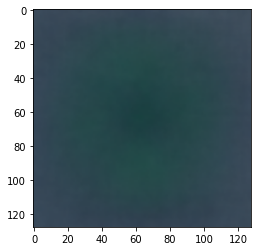

Mean image for Cranesbill class:


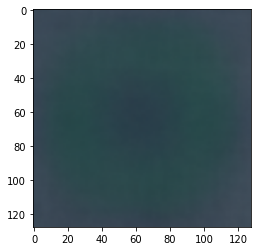

Mean image for Sugar Beet class:


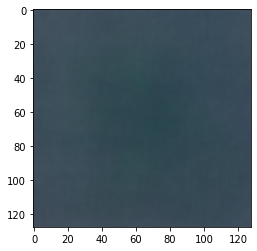

In [7]:
def show_mean_image(image_list, label):
  """A function to calculate and plot the mean image of a class"""
  print(f'Mean image for {label} class:') # statement to explain the following image
  mean_image = np.int_(np.mean(image_list, axis=0)) 
    # averages all of the images into a single image
    # converts the pixel values from float to integer
  plt.imshow(mean_image); # adds the image to the plot
  plt.show() # plots before continuing on

# Showing the mean image for each of the classes
show_mean_image(blackgrass_images, 'Black-grass')
show_mean_image(charlock_images, 'Charlock')
show_mean_image(cleavers_images, 'Cleavers')
show_mean_image(common_chickweed_images, 'Common Chickweed')
show_mean_image(common_wheat_images, 'Common Wheat')
show_mean_image(fat_hen_images, 'Fat Hen')
show_mean_image(loose_silkybent_images, 'Loose Silky-bent')
show_mean_image(maize_images, 'Maize')
show_mean_image(scentless_mayweed_images, 'Scentless Mayweed')
show_mean_image(shepherds_purse_images, 'Shepherds Purse')
show_mean_image(cranesbill_images, 'Cranesbill')
show_mean_image(sugar_beet_images, 'Sugar Beet')


While some of the larger seedlings have a faint green in the center, most of the image is blue or gray due to the pebbles around the seedling.

# Data Preprocessing

Before Gaussian Blurring and Normalization:


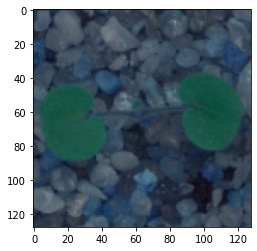

After Gaussian Blurring and Normalization:


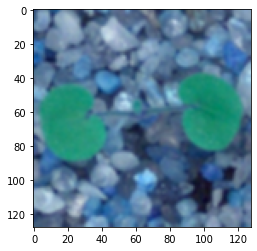

In [8]:
seedling_df2 = np.empty((4750, 128, 128, 3)) # creating an empty array for the blurred images
norm_img = np.zeros((128,128)) # zero matrix for the normalization process

for idx, img in enumerate(seedling_df): # iterating through the images
  # img gives all numbers associated with pixels for the 128x128x3 stored at seedling_df[idx]
  seedling_df2[idx] = cv.GaussianBlur(img, (3,3), 0) # blurs image and adds it to the new array
  seedling_df2[idx] = cv.normalize(seedling_df2[idx], norm_img, 0, 255, cv.NORM_MINMAX)
    # normalizes the blurred image to increase the contrast

seedling_after = np.int_(seedling_df2) # converts the values to integer

print('Before Gaussian Blurring and Normalization:')
plt.imshow(seedling_df[0]) # shows the first image
plt.show() # plots the image before continuing

print('After Gaussian Blurring and Normalization:')
plt.imshow(seedling_after[0]) # shows the blurred first image
plt.show() # plots the image before continuing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(seedling_df2, labels, test_size=.3, 
                                                    shuffle=True, stratify=labels, random_state=7)
  # splitting the data into training and test sets

# Data Compatibility

In [10]:
# Converting Labels to One Hot Encoded
y_train = pd.get_dummies(y_train) # converting the training set
y_test = pd.get_dummies(y_test) # converting the test set

# Printing the shapes of the split data
print(f'The new shape of the training labels are {y_train.shape}')
print(f'The new shape of the test labels are {y_test.shape}')

print(f'The shape of the training images is {X_train.shape}')
print(f'The shape of the test images is {X_test.shape}')

# Converting and Scaling the image data 
X_train = X_train.astype('float32') # converts the training pictures to float32
X_test = X_test.astype('float32') # converts the test pictures to float32
X_train = X_train/255 # scales the data between 0 and 1
X_test = X_test/255 # scales the data between 0 and 1

The new shape of the training labels are (3325, 12)
The new shape of the test labels are (1425, 12)
The shape of the training images is (3325, 128, 128, 3)
The shape of the test images is (1425, 128, 128, 3)


# Metrics

In [11]:
def multiclass_evaluation(model, X, y):
  """This produces a confusion matrix and an accuracy score.
     It handles the formatting of the predictions and ground truths."""
  
  ordered_classes = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 
                     'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 
                     'Scentless Mayweed', 'Shepherds Purse', 
                     'Small-flowered Cranesbill', 'Sugar beet']
                     # labels for the confusion matrix heatmap

  y_idx = [] # empty list to be filled with target indices
  for i in np.arange(y.shape[0]): # loops through indices of answers
    y_idx.append(np.argmax(y.iloc[i])) # converts the sparse encoding to indices

  predictions = np.argmax(model.predict(X), axis=1) # gets predictions

  cm = confusion_matrix(y_idx, predictions, normalize=None) # confusion matrix
  plt.figure(figsize=(12,6)) # slightly larger plot
  sns.heatmap(cm, xticklabels=ordered_classes, yticklabels=ordered_classes,
            annot=True, cbar=False); # puts the confusion matrix in a heatmap
  plt.show() # shows the plot

  acc = accuracy_score(y_idx, predictions) # calculates the accuracy
  print(f'The model has {acc : 0.2%} accuracy.') # states the accuracy

def loss_curve(model_training_info):
  """Creates a plot of the loss of the training data vs validation data across the epochs"""
  # Creating the DataFrame
  model_history  = pd.DataFrame(model_training_info.history) # creates the dataframe of training information
  model_history['epoch'] = model_training_info.epoch # adds a column for the number of epochs
  # Creates the learning curve plot
  plt.figure(figsize=(12,4))
  plt.xlabel('Epochs') # adds an x label to the plot
  plt.ylabel('Loss') # adds a y label to the plot
  plt.title('Learning Curve', fontdict={'fontsize':20}) # adds a title to the plot
  plt.plot(model_history['loss']) # plots the loss of the training data
  plt.plot(model_history['val_loss']) # plots the loss of the validation data
  plt.legend(('Training Data', 'Validation Data') , loc =0) # creates a legend in the upper right corner

# Model Building: 1st Model


In [12]:
data_augmentation = Sequential([RandomFlip('horizontal'), RandomRotation(.1), RandomZoom(.1)])
  # transforms the images through flipping, rotation, and zoom to add additional data to the model

base_model = tf.keras.applications.EfficientNetB7(input_shape=(128,128,3), # input_shape takes 1 picture at a time
                                                  include_top=False, # removes the top of the pretrained model
                                                  weights='imagenet') # uses the weights when trained on ImageNet
base_model.trainable = False # freezes the weights

model = Sequential([data_augmentation, # calls the Sequential model for data augmentation
                    base_model, # calls the pretrained model
                    Conv2D(filters=256, kernel_size=(3,3), padding='Same'), # adds a convolutional layer
                    MaxPool2D(), # adds a pooling layer
                    Flatten(), # reshapes the data into a 1D shape for the Dense layers
                    Dense(units=64, activation='relu'), # adds a Dense layer
                    Dense(units=32, activation='relu'), # adds a Dense layer
                    Dense(units=12, activation='softmax')]) # final output layer

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
  # using the standard optimizer and loss functions

learning_curve = model.fit(X_train, y_train, epochs=5, batch_size=128, 
                           validation_split=0.20, verbose=1)
  # fits the model with a validation split

Epoch 1/5
21/21 [==============================] - 83s 2s/step - loss: 10.4447 - accuracy: 0.0797 - val_loss: 9.2876 - val_accuracy: 0.1143
Epoch 2/5
21/21 [==============================] - 28s 1s/step - loss: 5.1850 - accuracy: 0.0876 - val_loss: 3.7714 - val_accuracy: 0.1338
Epoch 3/5
21/21 [==============================] - 28s 1s/step - loss: 3.0502 - accuracy: 0.0992 - val_loss: 2.4875 - val_accuracy: 0.1143
Epoch 4/5
21/21 [==============================] - 28s 1s/step - loss: 2.4959 - accuracy: 0.0947 - val_loss: 2.4805 - val_accuracy: 0.1098
Epoch 5/5
21/21 [==============================] - 28s 1s/step - loss: 2.4800 - accuracy: 0.1083 - val_loss: 2.4788 - val_accuracy: 0.1098


In [13]:
model.summary() # shows summary of layers, shapes, and parameters

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 efficientnetb7 (Functional)  (None, 4, 4, 2560)       64097687  
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 256)         5898496   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 256)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                      

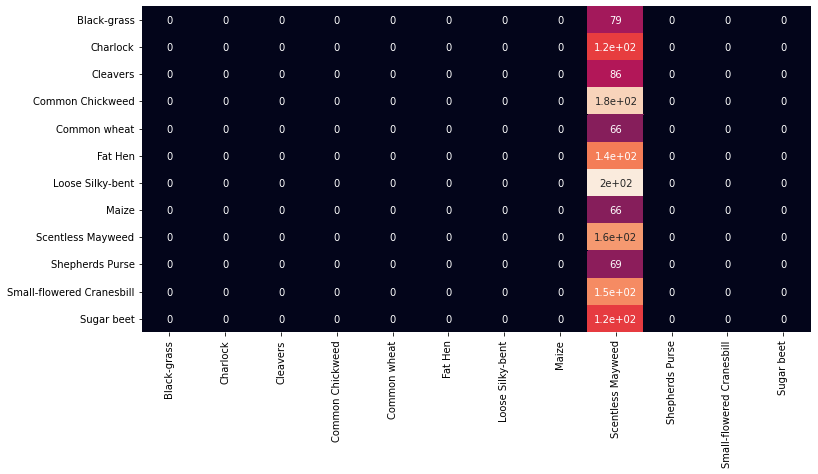

The model has  10.88% accuracy.


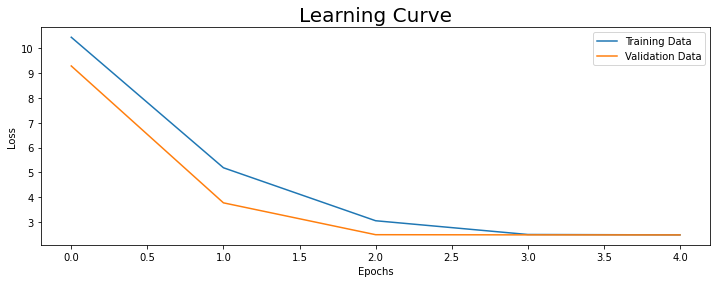

In [14]:
multiclass_evaluation(model=model, X=X_test, y=y_test) # evaluates the test data

loss_curve(learning_curve) # shows the loss curve during the training

## Results:

The model selects a single class as the prediction for each row. Despite using data augmentation and transfer learning, the model does not show any learning. This may be because of the additional layers that I added. I will remove everything except the base and the output layer to test for better results.

# Model Building: 2nd Model

In [15]:
model2 = Sequential([data_augmentation, # calls the data augmentation 
                    base_model, # calls the pretrained model
                    Flatten(), # reshapes the input for the Dense layers
                    Dense(units=256, activation='relu'), # single, larger Dense layer
                    Dense(units=12, activation='softmax')]) # output layer

model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
  # standard optimizer and loss functions
learning_curve2 = model2.fit(X_train, y_train, epochs=5, batch_size=128, 
                           validation_split=0.20, verbose=1)
  # fits the models with a validation split

Epoch 1/5
21/21 [==============================] - 72s 2s/step - loss: 50.9539 - accuracy: 0.1049 - val_loss: 17.1163 - val_accuracy: 0.1143
Epoch 2/5
21/21 [==============================] - 27s 1s/step - loss: 8.0917 - accuracy: 0.0707 - val_loss: 2.4847 - val_accuracy: 0.0571
Epoch 3/5
21/21 [==============================] - 27s 1s/step - loss: 2.6024 - accuracy: 0.0665 - val_loss: 2.4836 - val_accuracy: 0.0571
Epoch 4/5
21/21 [==============================] - 27s 1s/step - loss: 2.4827 - accuracy: 0.1064 - val_loss: 2.4823 - val_accuracy: 0.1338
Epoch 5/5
21/21 [==============================] - 27s 1s/step - loss: 2.4811 - accuracy: 0.1387 - val_loss: 2.4808 - val_accuracy: 0.1338


In [16]:
model2.summary() # summary of layers, shapes, and parameters

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 efficientnetb7 (Functional)  (None, 4, 4, 2560)       64097687  
                                                                 
 flatten_1 (Flatten)         (None, 40960)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               10486016  
                                                                 
 dense_4 (Dense)             (None, 12)                3084      
                                                                 
Total params: 74,586,787
Trainable params: 10,489,100
Non-trainable params: 64,097,687
_________________________________________________________________


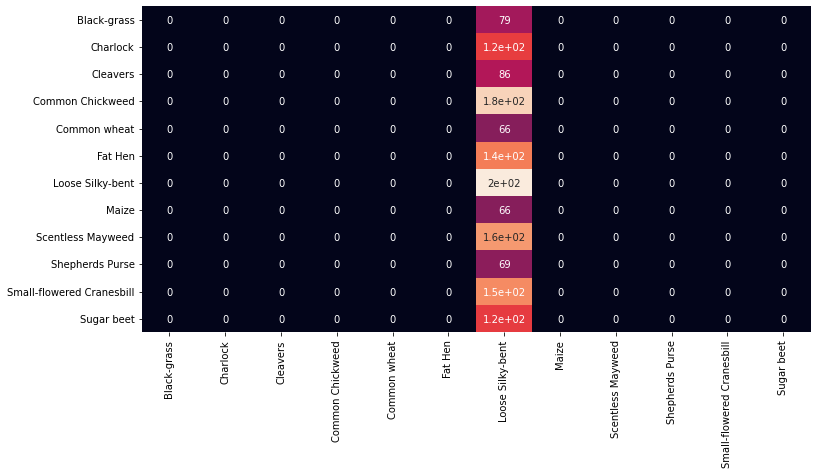

The model has  13.75% accuracy.


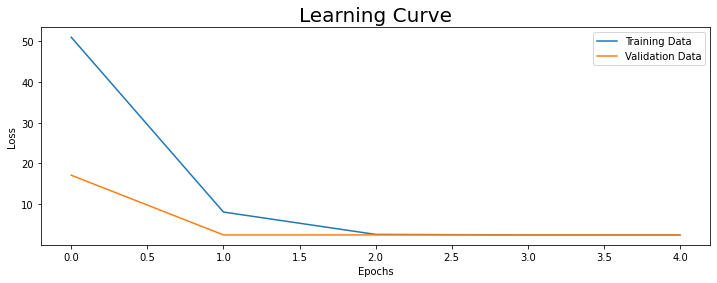

In [17]:
multiclass_evaluation(model2, X_test, y_test) # evaluates the model on the test data

loss_curve(learning_curve2) # plots the loss curve during the training

## Results:

Through unshown iteration, more complex and less complex designs using transfer learning have been tested. They all suffer from the same problem. The model only selects one class and does not learn.

# Model Building: Third Model

In [18]:
stopper = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
saver = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  # creates a callback for early stopping and model saving

base_model2 = tf.keras.applications.VGG19(include_top=False, input_shape=(128,128,3))
  # base model is VGG19 instead of EfficientNet
base_model2.trainable = False # freezes the weights

model3 = Sequential([data_augmentation, # calls the data augmentation
                     base_model2, # calls the VGG19 pretrained model
                     Flatten(), # reshapes the input data
                     Dense(128, activation='relu'), # adds a Dense layer
                     Dense(12, activation='softmax')]) # output layer

model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
  # standard optimizer and loss functions
learning_curve3 = model3.fit(X_train, y_train, epochs=10, batch_size=128, 
                           validation_split=0.20, verbose=1, callbacks=[stopper, saver])
  # fits the model with a validation split

Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 2.3237 - accuracy: 0.2274
Epoch 00001: val_accuracy improved from -inf to 0.40602, saving model to best_model.h5
21/21 [==============================] - 38s 1s/step - loss: 2.3237 - accuracy: 0.2274 - val_loss: 1.7869 - val_accuracy: 0.4060
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 1.5738 - accuracy: 0.5019
Epoch 00002: val_accuracy improved from 0.40602 to 0.48872, saving model to best_model.h5
21/21 [==============================] - 10s 476ms/step - loss: 1.5738 - accuracy: 0.5019 - val_loss: 1.4747 - val_accuracy: 0.4887
Epoch 3/10
21/21 [==============================] - ETA: 0s - loss: 1.3165 - accuracy: 0.5827
Epoch 00003: val_accuracy improved from 0.48872 to 0.60602, saving model to best_model.h5
21/21 [==============================] - 10s 470ms/step - loss: 1.3165 - accuracy: 0.5827 - val_loss: 1.2852 - val_accuracy: 0.6060
Epoch 4/10
21/21 [==============================] - ETA: 0

In [19]:
model3.summary() # summary of layers, shapes, and parameters

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               1048704   
                                                                 
 dense_6 (Dense)             (None, 12)                1548      
                                                                 
Total params: 21,074,636
Trainable params: 1,050,252
Non-trainable params: 20,024,384
_________________________________________________________________


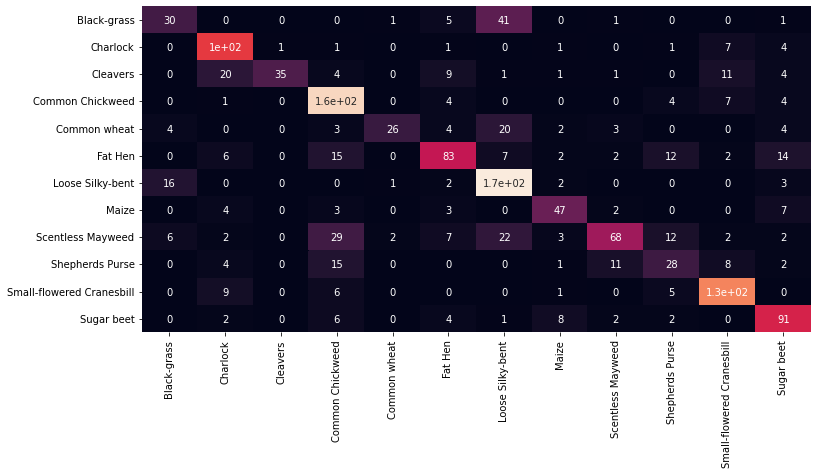

The model has  68.21% accuracy.


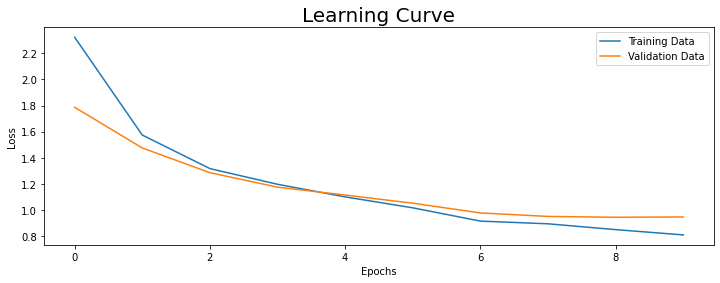

In [20]:
multiclass_evaluation(model3, X_test, y_test) # evaluates the model on the test data

loss_curve(learning_curve3) # plots the loss curve during training

## Results:

This time, the base model from the transfer learning was changed from EfficientNetB7 to VGG19. With a simple dense layer afterward and an output layer, the model performed much better than previous models.

Each training epoch improved the validation accuracy so more training will improve the overall model.

Now that we have a working model, we can also do some fine-tuning to further improve the performance of the model.

Edit: changes to the final layers made no improvements. The official 4th model will check if a different base model will make further improvements.

# Model Building: 4th Model

In [21]:
stopper = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
saver = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  # creates a callback for early stopping and model saving

base_model3 = tf.keras.applications.ResNet152V2(include_top=False, input_shape=(128,128,3))
  # pretrained model is ResNet152V2 this time
base_model3.trainable = False # freezes the weights

model4 = Sequential([data_augmentation, # calls the data augmentation
                     base_model3, # calls the pretrained ResNet model
                     Flatten(), # reshapes the data into a 1D shape
                     Dense(256, activation='relu'), # adds a larger Dense layer
                     Dense(128, activation='relu'), # adds a Dense layer
                     Dense(12, activation='softmax')]) # output layer

model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
  # standard optimizer and loss functions
learning_curve4 = model4.fit(X_train, y_train, epochs=10, batch_size=128, 
                             validation_split=0.20, verbose=1, callbacks=[stopper,saver])
  # fits the model with a validation split

Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 2.1825 - accuracy: 0.4023
Epoch 00001: val_accuracy improved from -inf to 0.58346, saving model to best_model2.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


21/21 [==============================] - 43s 1s/step - loss: 2.1825 - accuracy: 0.4023 - val_loss: 1.3138 - val_accuracy: 0.5835
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 1.0818 - accuracy: 0.6459
Epoch 00002: val_accuracy improved from 0.58346 to 0.66767, saving model to best_model2.h5
21/21 [==============================] - 18s 884ms/step - loss: 1.0818 - accuracy: 0.6459 - val_loss: 1.0036 - val_accuracy: 0.6677
Epoch 3/10
21/21 [==============================] - ETA: 0s - loss: 0.8294 - accuracy: 0.7241
Epoch 00003: val_accuracy improved from 0.66767 to 0.71278, saving model to best_model2.h5
21/21 [==============================] - 18s 887ms/step - loss: 0.8294 - accuracy: 0.7241 - val_loss: 0.9132 - val_accuracy: 0.7128
Epoch 4/10
21/21 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.7752
Epoch 00004: val_accuracy improved from 0.71278 to 0.73233, saving model to best_model2.h5
21/21 [==============================] - 18s 883ms/s

In [22]:
model4.summary() # summary of the layers, shapes, and parameters

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_7 (Dense)             (None, 256)               8388864   
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 12)                1548      
                                                                 
Total params: 66,754,956
Trainable params: 8,423,308
N

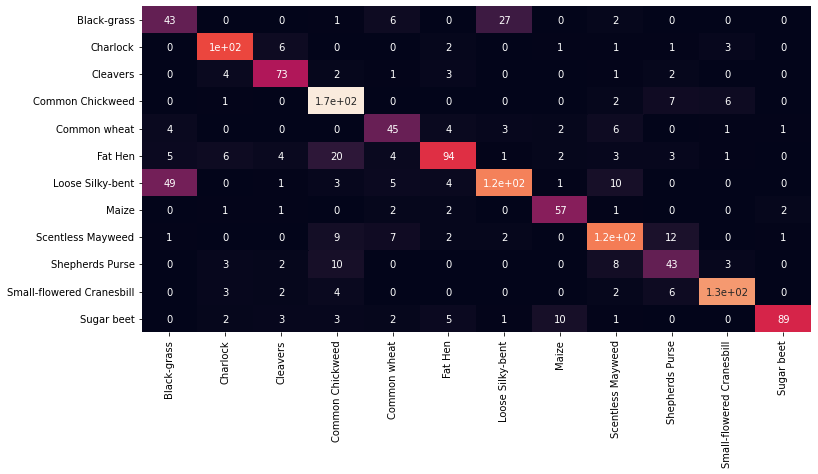

The model has  76.49% accuracy.


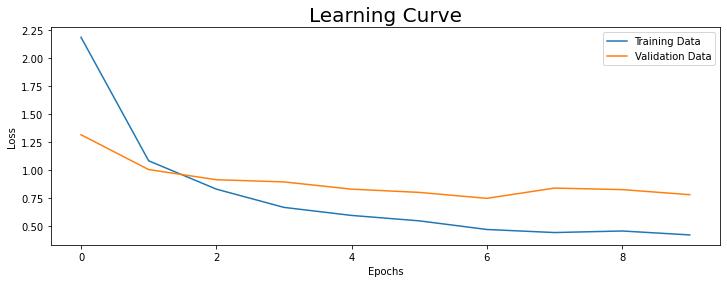

In [23]:
multiclass_evaluation(model4, X_test, y_test) # evaluates the model on the test data

loss_curve(learning_curve4) # plots the loss curve

## Results:

The fourth model had slightly better validation and test performance than the third model. While the third model is balanced between the training performance and the validation performance, the fourth model is clearly overfit.

Perhaps some regularization will improve the performance slightly. We will add some dropout layers to the previous model.

Another important note is that most of the errors occur trying to distinguish between Black-grass and Loose Silky-bent. Even though Loose Silky-bent has the most images of its class, there are still fewer than 1000 images. Black-grass only has 263 images. Therefore, obtaining more images of Black-grass would be a good way to reduce the errors.

# Fifth Model

In [24]:
model5 = Sequential([data_augmentation, # calls the data augmentation
                     base_model3, # calls the pretrained ResNet model
                     Flatten(), # reshapes the data into a 1D shape
                     Dense(256, activation='relu'), # adds a larger Dense layer
                     Dropout(.25), # adds a Dropout layer for regularization
                     Dense(128, activation='relu'), # another Dense layer
                     Dropout(.25), # another Dropout layer
                     Dense(12, activation='softmax')]) # output layer

model5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
  # standard optimizer and loss functions
learning_curve5 = model5.fit(X_train, y_train, epochs=10, batch_size=128, 
                             validation_split=0.20, verbose=1, callbacks=[stopper,saver])
  # fits the model with a validation split

Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 2.4719 - accuracy: 0.3019
Epoch 00001: val_accuracy did not improve from 0.77744
21/21 [==============================] - 40s 1s/step - loss: 2.4719 - accuracy: 0.3019 - val_loss: 1.4192 - val_accuracy: 0.5293
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 1.5883 - accuracy: 0.4868
Epoch 00002: val_accuracy did not improve from 0.77744
21/21 [==============================] - 16s 777ms/step - loss: 1.5883 - accuracy: 0.4868 - val_loss: 1.2766 - val_accuracy: 0.5805
Epoch 3/10
21/21 [==============================] - ETA: 0s - loss: 1.3228 - accuracy: 0.5583
Epoch 00003: val_accuracy did not improve from 0.77744
21/21 [==============================] - 16s 778ms/step - loss: 1.3228 - accuracy: 0.5583 - val_loss: 1.0781 - val_accuracy: 0.6466
Epoch 4/10
21/21 [==============================] - ETA: 0s - loss: 1.1932 - accuracy: 0.6038
Epoch 00004: val_accuracy did not improve from 0.77744
21/21 [====

In [25]:
model5.summary() # summary of the layers, shapes, and parameters

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)              

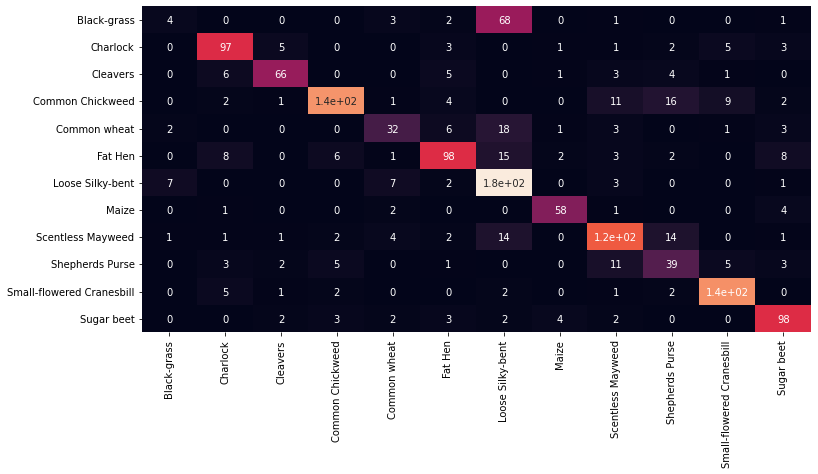

The model has  74.11% accuracy.


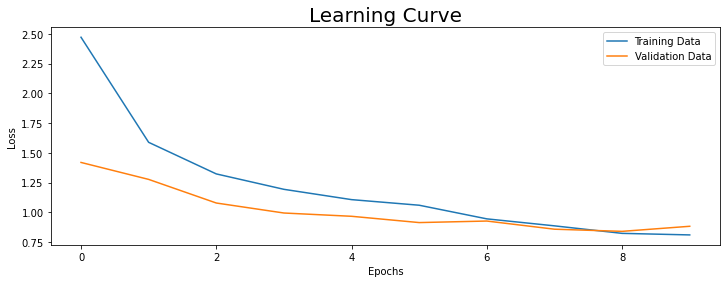

In [26]:
multiclass_evaluation(model5, X_test, y_test) # evaluates the model on the test data

loss_curve(learning_curve5) # plots the loss curve

## Results:

The fifth model is not overfit, but the validation and test performance did not increase as a result of the regularization. It performs about the same as the fourth model.

Almost all of the errors were related to Black-grass.

# Conclusion

While the fourth and fifth models have the similar performances, we will choose the fourth model because it has slightly better performance. Although, the fifth model is also a reasonable choice as it may be more robust on new data.

To further improve the model, it is recommended to get more pictures of Black-grass seedlings.